# Saving and Restoring Models in Python
© Explore Data Science Academy

 ## Learning Objectives

In this train you will learn how to:

- Save and Restore Sklearn models;
- Understand the principle of object serialization; and
- Load standard sklearn datasets.

## Outline
This train is structured as follows:

- Train a multiple linear regression model;
- Save the model (i.e. trained model parameters) to a file; and
- Restore a saved model and use it to make predictions.

## Introduction

Once a model is trained, it is best to separate the model from the training code and use it to make predictions going forward. This ensures the model is lightweight and efficient to put into production. We often do this by 'saving' the model. Saving a model entails storing its parameters and all information needed to make predictons, 

i.e. in the case of a model represented as $y = ax + b$, we would save the $a$ and $b$ parameters, and the fact that it is a linear model.

At this point in the course, you should be familiar with how to train, test and measure the performance of various machine learning models on a given dataset. In this train we cover how to save your models into a portable format and deploy them in the wild.

## Getting started 

Let's start by training a model that we can save later.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load data

In this train, we'll build a multiple linear regression model on Sklearn's internal datasets. We'll use the diabetes dataset which contains a set of predictive variables for predicting some quantitative measure of diabetes disease progression.  

In [2]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

The data description can be shown as follows: 

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = pd.Series(data.target)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
# split data into X and y
y = df['progression']
X = df.drop('progression',axis=1)

### Preprocessing

Having reviewed the data, we now perform a minimal amount of preprocessing to prepare for model fitting and evaluation.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model fitting and evaluation

We now fit our model to the data. For this exercise we choose to select a vanilla linear regression model, however, there is nothing stopping us from using more complex models within `sklearn`.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# define the model 
model = LinearRegression()

# fit the model 
model.fit(X_train, y_train)

# get predictions on the test set 
y_pred = model.predict(X_test)

# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.1732878832318


In cases where visualising how the model performs on the actual data is not possible (i.e. too many dimensions), we can plot actual vs predicted $y$ values:

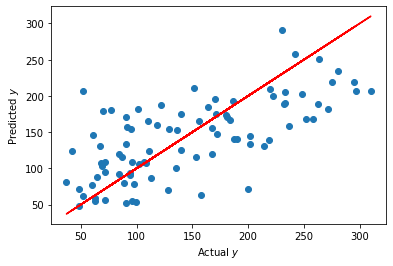

In [9]:
plt.scatter(y_test,y_pred) 
plt.plot(y_test,y_test,"r") # perfect model line
plt.ylabel("Predicted $y$")
plt.xlabel("Actual $y$")
plt.show()

At a glance, our MLR model seems to have decent performance. Now let's try to save it. 

## Object Serialization

Object serialization is the storing of variables and their values as a file. If we save a standard python program (i.e. `.py` file), the program needs to be executed before variables can realise their values. For example, think of a saved Jupyter Notebook file (`.ipynb`) where you have to re-execute all program cells before you can continue working on your program. In the context of machine learning models, this means you have to re-train your models on the original train data before you can use them on other unseeen data. 

Object serialization allows you to store your variables and their state as a file, which upon loading can restore the variable and the value it had when you saved it. This way, we can save our sklearn models along with their optimal parameters and load them later for reuse. In this train, we will explore **pickle**, a common python library for object serialization. 

## Saving a model with Pickle
Files saved using `pickle` are called *pickles* and the process of making them is referred to as *pickling* (we know, they took the metaphor quite far...). 
Luckily for us, saving models using `pickle` follows a similar structure to that of creating or writing to a file in Python. 

In [10]:
import pickle

model_save_path = "mlr_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(model,file)

This creates a portable "model.pkl" file in the specified file path which we can move between computers, email to others, use for model versioning, etc. We can use this file to make predictions in the future.

## Restoring a model with Pickle
As you might have guessed, restoring a pickled file is similar to reading a file.

In [11]:
model_load_path = "mlr_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

At this stage, we have loaded our saved model from the load path and loaded it into the `unpickled_model` variable.

### Using the model files to make predictions
**NB!** Imagine that we are now starting on a new Jupyter Notebook and this was all we put in it.
You will notice there is no data and no training in the code since the model is already trained and the training data is no longer needed.

All that's left now is to load the data into the model and get predictions.

In [12]:
# get predictions from unpickled model
y_pred = unpickled_model.predict(X_test)

At this point, we have model predictions that we can use wherever we want.

In [13]:
# calculate performance metrics
print("MSE:",mean_squared_error(y_test, y_pred))

MSE: 2900.1732878832318


### Things to keep in mind

In order to ensure that the behaviour of your models is reproducible after serialization you should keep the following in mind:

- **The Python environment dependencies** (version of python packages). Make sure the model is deployed into an identical environment, i.e. `sklearn` versions are the same as in the model training environment.

- **The Python version**. It is unreasonble to expect a model trained using Python 2.7 will work when restored to an environment with Python 3.6. As such it is important to use consistent versions of Python.


## Conclusion

Serializing your models can be extremely useful, not only can you save your models but you can also re-train them later when more data is available.  

In this train we covered how to:

- Train a multiple linear regression model.
- Save the model (i.e. trained model parameters) to a file.
- Restore a saved model and use it to make predictions.

## Appendix

 - [Model saving/loading from the Sklearn docs](https://scikit-learn.org/stable/modules/model_persistence.html)